### Question 7 - Using the data from Question 4, write code to analyze the data and answer the following questions 
Note -

Draw plots to demonstrate the analysis for the following questions for better visualizations
Write code comments wherever required for code understanding
Insights to be drawn -

Get all the Earth meteorites that fell before the year 2000
Get all the earth meteorites co-ordinates who fell before the year 1970
Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

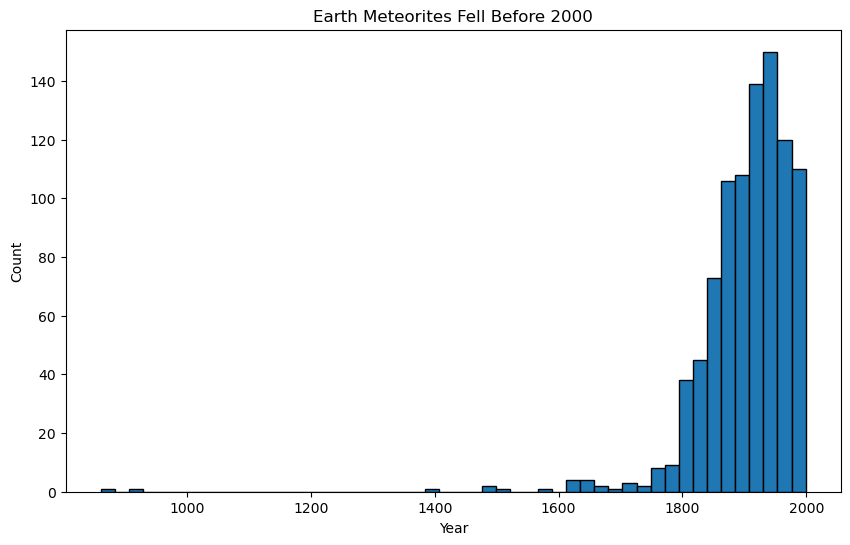

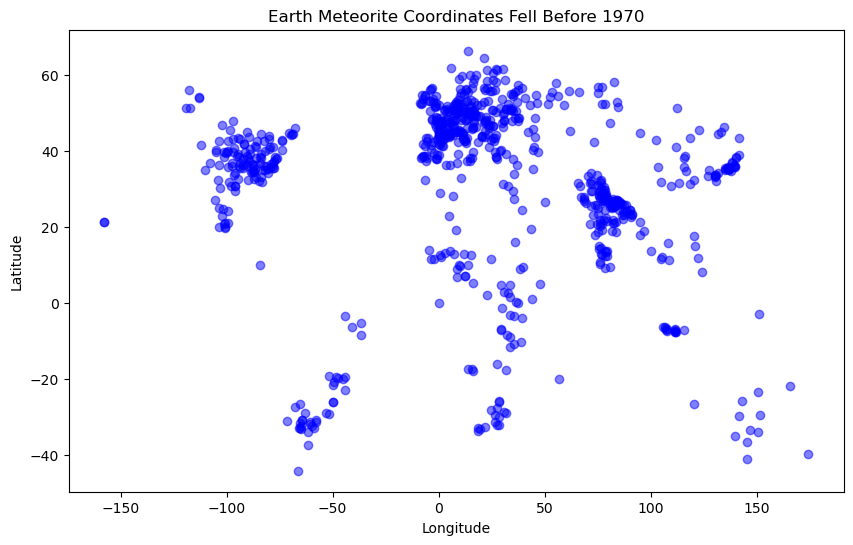

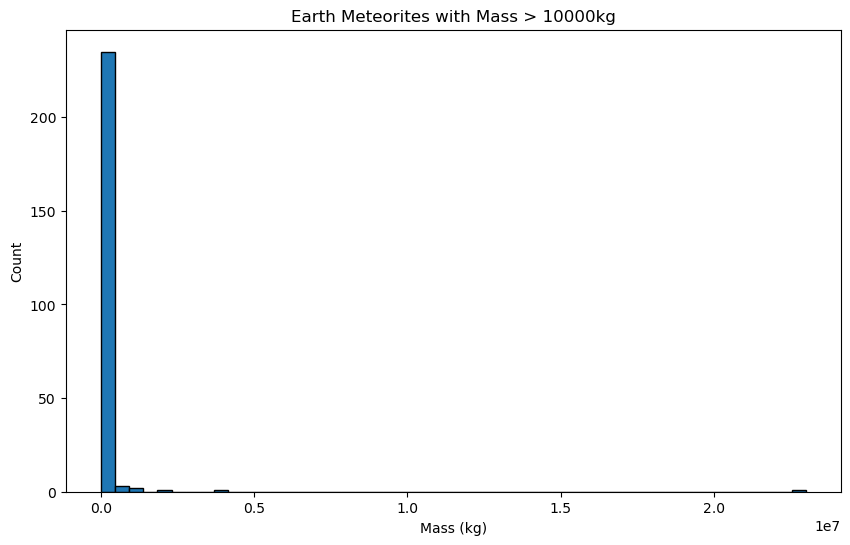

In [29]:
import requests
import matplotlib.pyplot as plt

# Function to download data from the provided URL
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# Function to analyze the data and answer the questions
def analyze_data(data):
    meteorites_before_2000 = []
    coordinates_before_1970 = []
    meteorites_greater_than_10000kg = []

    for meteorite in data:
        # Check if the 'year' attribute exists
        if 'year' in meteorite:
            year = int(meteorite['year'].split('-')[0])
            
            # Question 1: Get all Earth meteorites that fell before the year 2000
            if year < 2000:
                meteorites_before_2000.append(meteorite)

        # Check if the 'reclong' and 'reclat' attributes exist
        if 'reclong' in meteorite and 'reclat' in meteorite:
            # Question 2: Get all Earth meteorite coordinates that fell before the year 1970
            if year < 1970:
                coordinates_before_1970.append((float(meteorite['reclong']), float(meteorite['reclat'])))

        # Question 3: Get all Earth meteorites with a mass greater than 10000kg
        if 'mass' in meteorite and float(meteorite['mass']) > 10000:
            meteorites_greater_than_10000kg.append(meteorite)

    return meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg

# Function to plot the analysis results
def plot_analysis_results(meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg):
    # Plot 1: Earth meteorites fell before the year 2000
    years = [int(meteorite['year'].split('-')[0]) for meteorite in meteorites_before_2000]
    plt.figure(figsize=(10, 6))
    plt.hist(years, bins=50, edgecolor='black')
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title("Earth Meteorites Fell Before 2000")
    plt.show()

    # Plot 2: Earth meteorite coordinates fell before the year 1970
    longitudes = [coordinate[0] for coordinate in coordinates_before_1970]
    latitudes = [coordinate[1] for coordinate in coordinates_before_1970]
    plt.figure(figsize=(10, 6))
    plt.scatter(longitudes, latitudes, color='blue', alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Earth Meteorite Coordinates Fell Before 1970")
    plt.show()

    # Plot 3: Earth meteorites with mass greater than 10000kg
    masses = [float(meteorite['mass']) for meteorite in meteorites_greater_than_10000kg]
    plt.figure(figsize=(10, 6))
    plt.hist(masses, bins=50, edgecolor='black')
    plt.xlabel("Mass (kg)")
    plt.ylabel("Count")
    plt.title("Earth Meteorites with Mass > 10000kg")
    plt.show()

    # URL of the data source
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Download the data
data = download_data(url)

# Analyze the data and get the results
meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg = analyze_data(data)

# Plot the analysis results
plot_analysis_results(meteorites_before_2000, coordinates_before_1970, meteorites_greater_than_10000kg)
